# La importancia de lavarse las manos
--------

# 1. El Dr Ignaz Semmelweis
<img style="float: left;" src="https://upload.wikimedia.org/wikipedia/commons/thumb/c/c0/Ignaz_Semmelweis.jpg/300px-Ignaz_Semmelweis.jpg">
Este es el Dr Ignaz Semmelweis (1818-1865), médico húngaro reconocido hoy como el creador de los procedimientos antisépticos.
En los primeros años de la década de 1840, el **10% de las mujeres** que daban a luz en el hospital General de Viena **morían después del parto**. Al Dr Semmelweis se le conoce también como el "salvador de madres" pues descubrió que la incidencia de la **sepsis puerperal** (o "[fiebre del parto](https://es.wikipedia.org/wiki/Sepsis_puerperal)") podía disminuirse drásticamente mediante la **desinfección de las manos**. A pesar de varias publicaciones difundiendo sus resultados y demostrando que el lavado profundo de las manos de los médicos reducía significativamente la mortalidad a menos del 1%, sus observaciones entraban **en conflicto con la opinión de los popes** de su tiempo y sus ideas fueron rechazadas. Algunos médicos se sintieron ofendidos por la sugerencia de que ellos eran responsables de la muerte de las embarazadas por no lavar adecuadamente sus manos antes de atender a sus pacientes. Las recomendaciones de Semmelweis solo fueron aceptadas después de su muerte, cuando **Louis Pasteur** confirmó la teoría de los gérmenes como causantes de las infecciones (Fuente: [Wikipedia](https://es.wikipedia.org/wiki/Ignác_Semmelweis)).
      
En este cuaderno vamos a analizar los datos que llevan a Semmelweis a la conclusión de la importancia de lavarse las manos. Empezaremos observando los datos que hacen que Semmelweis reconozca que algo va mal en el Hospital de Viena. 

In [79]:
# Importar pandas
import pandas as pd

# Leer el dataset muertes_xclinica.csv y asignarlo a la variable muertes
muertes = pd.read_csv('datasets/muertes_xclinica.csv', parse_dates=["Año"]) # Python 2.7?
muertes = pd.read_csv('datasets/muertes_xclinica.csv') # Python 3?


# Imprimir muertes
print(muertes)

     Año  Nacimientos  Muertes  Clínica
0   1841         3036      237        1
1   1842         3287      518        1
2   1843         3060      274        1
3   1844         3157      260        1
4   1845         3492      241        1
5   1846         4010      459        1
6   1841         2442       86        2
7   1842         2659      202        2
8   1843         2739      164        2
9   1844         2956       68        2
10  1845         3241       66        2
11  1846         3753      105        2


# 2. El número alarmante de muertes
La tabla anterior muestra el número de mujeres que dieron a luz en las dos clínicas del Hospital General de Viena
durante los años 1841 a 1846. También se aprecia que dar a luz era una actividad muy peligrosa. Un número alarmante de mujeres morían como resultado del parto, la mayoría de ellas por sepsis puerperal. 
  
Esto puede verse de forma más clara si calculamos la proporción de muertes sobre el número de partos. 

In [82]:
# Calcular la proporción de muertes y asignarlo a una nueva columna (Prop_muertes).
muertes["Prop_muertes"] = muertes["Muertes"] / muertes["Nacimientos"]

# Extraer los datos de la clínica1 y asignarlos a 'muertes1'; extraer los datos de la clínica2 y asignarlos a 'muertes2'.
muertes1 = muertes[muertes["Clínica"] == 1]
muertes2 = muertes[muertes["Clínica"] == 2]

# Ver los primeros datos de muertes1 usando el método head
muertes1.head()

,Año,Nacimientos,Muertes,Clínica,Prop_muertes
0,1841,3036,237,1,0.078063
1,1842,3287,518,1,0.157591
2,1843,3060,274,1,0.089542
3,1844,3157,260,1,0.082357
4,1845,3492,241,1,0.069015


In [83]:
# Ver los últimos datos de muertes2 usando el método tail
muertes2.tail()

,Año,Nacimientos,Muertes,Clínica,Prop_muertes
7,1842,2659,202,2,0.075968
8,1843,2739,164,2,0.059876
9,1844,2956,68,2,0.023004
10,1845,3241,66,2,0.020364
11,1846,3753,105,2,0.027978


# 3. Muerte en la clínica
Si representamos la proporción de muertes en cada clínica, se observa un patrón interesante.

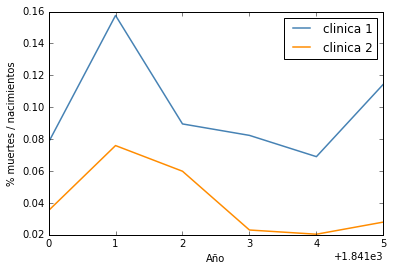

In [21]:
# El plot aparece en el cuaderno
%matplotlib inline

# Representar en una figura la proporción de muertes en las dos clínicas
ax = muertes1.plot(x = "Año", y= "Prop_muertes", label = "clinica 1", color = "steelblue", linewidth = 1.5)
muertes2.plot(x = "Año", y= "Prop_muertes", label = "clinica 2", color = "darkorange", linewidth = 1.5, ax = ax)
ax.set_ylabel("% muertes / nacimientos")

# 4. A lavarse las manos
¿ Por qué la proporción de muertes es tan elevada en la clínica 1? Semmelweis encontró el mismo patrón y quedo desconcertado. 
La única diferencia entre las clínicas era que en la clínica 1 trabajaban mayoritariamente estudiantes de medicina y en 
la clínica 2 matronas. Mientras éstas se dedicaban esencialmente a ayudar a las mujeres durante el parto, los estudiantes de medicina
pasaban también tiempo en la sala de autopsias examinando cuerpos.  
  
Semmelweis comenzó a sospechar que 'algo' desde los cuerpos de los fallecidos se extendía a las manos de los estudiantes 
provocando la sepsis puerperal. Así, en un intento deseperado de detener la tasa de mortalidad tan elevada dió la orden: 
    ¡Lavaros las manos!  
    
En ese momento, nadie en toda Viena tiene aún conocimiento ni ha escuchado nada sobre bacterias, de modo que su orden se entendió 
como una extravagancia controvertida. 
  
Veamos los datos clínicos mensuales para analizar si el lavado de manos tiene algún efecto.

In [22]:
# Leer el dataset muertes_xmes.csv y asignarlo a la variable mensual
mensual = pd.read_csv('datasets/muertes_xmes.csv', parse_dates=["Fecha"])

In [86]:
# Extraer nombre de las columnas del dataset
mensual.columns

Index([u'Fecha', u'Nacimientos', u'Muertes', u'Prop_muertes'], dtype='object')

In [23]:
# Dimensiones del dataset
mensual.shape

(98, 3)

In [24]:
# Calcular la proporción de las muertes / nacimientos
mensual["Prop_muertes"] = mensual["Muertes"] / mensual["Nacimientos"]

# Imprimir las primeras columnas de mensual 
mensual.head()

,Fecha,Nacimientos,Muertes,Prop_muertes
0,1841-01-01 00:00:00,254,37,0.145669
1,1841-02-01 00:00:00,239,18,0.075314
2,1841-03-01 00:00:00,277,12,0.043321
3,1841-04-01 00:00:00,255,4,0.015686
4,1841-05-01 00:00:00,255,2,0.007843


# 5. El efecto del lavado de manos
Ahora podemos observar la proporción de muertes a lo largo del tiempo. En la figura siguiente no está representado el. momento en el que se da la orden de lavarse las manos pero la proporción de muertes se reduce de tal forma que debería estar claro.

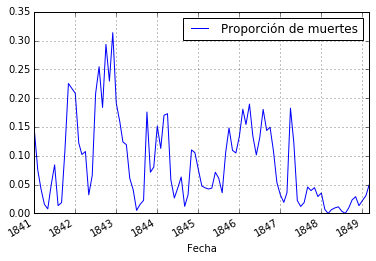

In [26]:
# Representar en una figura la proporción de muertes mensual
ax = mensual.plot(x = "Fecha", y= "Prop_muertes", label = "Proporción de muertes")
ax.grid() # añade ejes secundarios

# 6. El efecto del lavado de manos destacado
A partir del verano de 1847 la proporción de muertes se reduce considerabalemente y ya no aumenta. Sí, es entonces, cuando  
Semmelweis obligó al personal a lavarse las manos. El efecto es aún más claro si los destacamos en la figura.

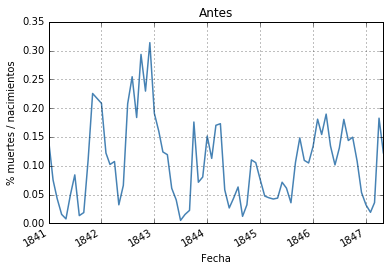

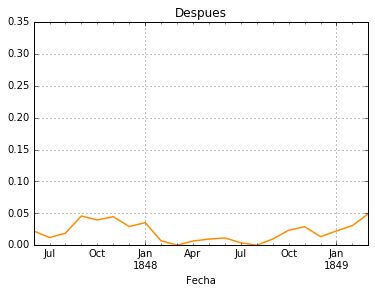

In [71]:
# Fecha cuando el lavado de manos se vuelve obligatorio
#import pandas as pd
empieza_lavado_manos = pd.to_datetime('1847-06-01')

# Dividir 'mensual' entre "antes y después" de que se haga obligatorio el lavado de manos
ind = mensual.index[mensual['Fecha'] == empieza_lavado_manos].tolist()
antes_lavado  = mensual.iloc[0:ind[0],]
despues_lavado = mensual.iloc[ind[0]:,]

# Plot monthly proportion of deaths before and after handwashing
%matplotlib inline
ax = antes_lavado.plot(x = "Fecha", y= "Prop_muertes", title = "Antes",  legend = False, 
                       color = "steelblue", linewidth = 1.5)
ax.set_ylabel("% muertes / nacimientos")
ax.grid()
bx = despues_lavado.plot(x = "Fecha", y= "Prop_muertes", title = "Despues",  legend = False, 
                         color = "darkorange", linewidth = 1.5)
bx.set_ylim(0, 0.35)
bx.grid()
# falta poner los 2 plots en el la misma linea!

## 7. ¿Hay realmente menos muertes tras el lavado de manos?
De nuevo, vemos que en la figura se observa el gran efecto que tuvo el lavado de manos. Pero, vayamos a cuantificarlo. Por ejemplo, ¿cúanto se redujo la mortalidad mensual de media?


In [87]:
# Diferencia en la proporción muertes mensual debidas al lavado de manos
antes_prop = antes_lavado['Prop_muertes']
despues_prop = despues_lavado['Prop_muertes']
media_dif = despues_prop.mean() - antes_prop.mean()
media_dif

-0.083956607511833356

## 8. Bootstrap analisis
¡El lavado de manos redujo la proporción de muertes sobre 8 puntos porcentuales! El resultado es que las muertes pasan de 10% de media a sólo 2% (lo que por otra parte sigue considerándose elevado para el estándar moderno, sobre todo en los países [desarrollados](http://apps.who.int/iris/bitstream/10665/204114/1/WHO_RHR_15.23_spa.pdf?ua=1)). 
Para tener idea de la 'incertidumbre' que rodea a ese valor medio (cúanto se reduce la mortalidad de la madre durante el parto) podemos estimar el intervalo de confianza (aquí lo calcularemos mediante el método bootstrap).

In [88]:
# Bootstrap analisis de la reducción de muertes debida al lavado de manos
boot_media_dif = []
for i in range(3000):
    boot_antes = antes_prop.sample(frac=1, replace = True)
    boot_despues = despues_prop.sample(frac=1, replace = True)
    boot_media_dif.append( boot_despues.mean() - boot_antes.mean() )

# Calculating a 95% confidence interval from boot_mean_diff 
intervalo_confidencia = pd.Series(boot_media_dif).quantile([0.025,0.975])
intervalo_confidencia

0.025   -0.100378
0.975   -0.067116
dtype: float64

## 9. El destino del Dr. Semmelweis
Con un intervalo de confianza del 95% podemos afirmar que el lavado de manos en el Hospital General de Viena redujo
la muertes entre 6.7%-10. Visto en conjunto, parece que Semmelweiss encontró la evidencia sólida de que un 
procedimiento sencillo pero muy efectivo como era 'lavarse las manos' podía salvar muchas vidas.
La tragedia es que a pesar de esta evidencia, la teoría de Semmelweiss, a saber que la 'fiebre del parto' estaba provocada por alguna 'sustancia' (bacterias) de 
los cuerpos de la sala de autopsias), fue ridiculizada por sus colegas contemporáneos. La comunidad médica 
mayoritariamente rechazó su descubrimiento y en 1849 se le obligó a abandonar el Hospital General. La estadística y 
los argumentos estadísticos no eran comunes en ese momento en Medicina. Semmelweiss sólo publicó sus datos en largas 
tablas de datos crudos (como las que hemos usado en este ejercicio) pero no mostró ningún gráfico o figura ni estimó 
los intervalos de confianza. 

De haber tenido acceso a un Python notebook, quizás hubiera tenido más éxito a la hora de convencer a sus colegas 
de Viena de la imprtancia de lavarse las manos.

In [ ]:
# Los datos de Semmelweis demuestran que (Verdadero o Falso?):
medicos_deben_lavarse_las_manos = 